In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
legodata = pd.read_csv('legodata.csv')

In [3]:
legodata.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [4]:
#getting calculations of numerical values

legodata.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000
mean,67.620901,17.712008,549.549445,4.326781,49673.315237,4.508759,4.237760
std,88.030342,37.363297,861.187316,0.649798,27082.679917,0.520361,0.652015
min,2.272400,1.000000,1.000000,1.000000,630.000000,1.800000,1.000000
25%,19.990000,3.000000,117.000000,4.000000,31066.000000,4.300000,4.000000
50%,36.587800,6.000000,262.000000,4.500000,60137.500000,4.700000,4.300000
75%,79.287800,14.000000,598.000000,4.800000,71238.000000,4.900000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,853638.000000,5.000000,5.000000


There are couple of concerning facts of this data:<br> 'num_reviews' column shows that maximum reviews are 367, and minimum only 1. I would like to inpspct this feature more, since we cannot draw conclusions about data sets which consit only 1 review...<br>
'piece_count' column minimum value 1. Interesting. Is there a lego set with only one piece?

In [5]:
print(legodata[legodata['list_price']>1000])

     ages  list_price  num_reviews  piece_count  play_star_rating  \
1997  16+   1035.7800        198.0       7541.0               4.0   
5362  16+   1097.9390        198.0       7541.0               4.0   
7625  16+   1035.7800        198.0       7541.0               4.0   
8066  16+   1104.8700        198.0       7541.0               4.0   
8529  16+   1035.7800        198.0       7541.0               4.0   
8985  16+   1064.9929        198.0       7541.0               4.0   
9412  16+   1015.0000        198.0       7541.0               4.0   

                                              prod_desc  prod_id  \
1997  Travel the LEGO® galaxy in the ultimate Millen...  75192.0   
5362  Travel the LEGO® galaxy in the ultimate Millen...  75192.0   
7625  Travel the LEGO® galaxy in the ultimate Millen...  75192.0   
8066  Travel the LEGO® galaxy in the ultimate Millen...  75192.0   
8529  Travel the LEGO® galaxy in the ultimate Millen...  75192.0   
8985  Travel the LEGO® galaxy in the ul

The most expensive lego set is Milenium Falcon and it is sold in 7 countries in our data set.

In [6]:
len(legodata[legodata['num_reviews']<3])

2376

2376 lego sets or items has less than 3 reviews.

In [7]:
print(legodata[legodata['piece_count']==1])

      ages  list_price  num_reviews  piece_count  play_star_rating  \
116   4-99     14.9900         24.0          1.0               4.3   
117   4-99      7.9900          6.0          1.0               4.7   
118   4-99      7.9900         46.0          1.0               3.2   
123     4+      2.4900        180.0          1.0               4.0   
125   4-99      7.9900         24.0          1.0               3.9   
...    ...         ...          ...          ...               ...   
9546  4-99     18.2878         24.0          1.0               4.3   
9548  4-99     10.9678         46.0          1.0               3.2   
9549  4-99     10.9678          6.0          1.0               4.7   
9554    4+      3.0378        180.0          1.0               4.0   
9645  1½-5     17.0678         15.0          1.0               4.4   

                                              prod_desc  prod_id  \
116   Add another useful piece to your LEGO® collect...  10701.0   
117    Create your own 

It looks like 1 piece lego 'sets' exist. In this data it is additional piecies you can add to your lego set, or baseplates.


In [8]:
# calculating price per piece in lego data sets:

legodata['price_per_piece'] = legodata['list_price']/legodata['piece_count']

In [9]:
legodata.head(2)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,price_per_piece
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,0.108267
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,0.118988


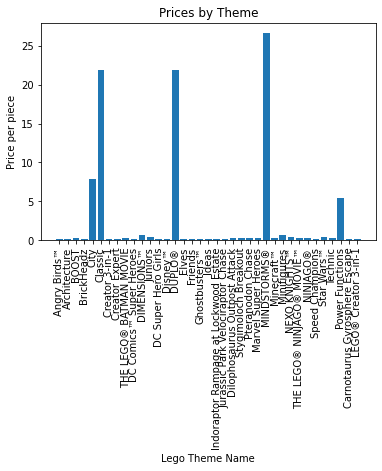

In [10]:
#checking if price per piece differ along the themes:

plt.bar(x='theme_name', height = 'price_per_piece', data = legodata)
_=plt.xlabel('Lego Theme Name')
plt.xticks(rotation = 90)
_ = plt.ylabel('Price per piece')
_ = plt.title('Prices by Theme')

It seems that there are some outliers in the prices, would like to look at them closer.

In [11]:
legodata.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating,price_per_piece
count,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000
mean,67.620901,17.712008,549.549445,4.326781,49673.315237,4.508759,4.237760,0.369056
std,88.030342,37.363297,861.187316,0.649798,27082.679917,0.520361,0.652015,1.473861
min,2.272400,1.000000,1.000000,1.000000,630.000000,1.800000,1.000000,0.042359
25%,19.990000,3.000000,117.000000,4.000000,31066.000000,4.300000,4.000000,0.105476
50%,36.587800,6.000000,262.000000,4.500000,60137.500000,4.700000,4.300000,0.132327
75%,79.287800,14.000000,598.000000,4.800000,71238.000000,4.900000,4.700000,0.181907
max,1104.870000,367.000000,7541.000000,5.000000,853638.000000,5.000000,5.000000,26.600000


The highest price for 1 piece is $26.6. 

In [12]:
legodata[legodata['price_per_piece']>10]

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,price_per_piece
116,4-99,14.9900,24.0,1.0,4.3,Add another useful piece to your LEGO® collect...,10701.0,"Whether you’re creating a street scene, castle...",Very Easy,Gray Baseplate,4.1,Classic,3.5,US,14.9900
276,1½-5,14.9900,15.0,1.0,4.4,Start creations here!,2304.0,Even big imaginations need a place to start--a...,Easy,LEGO® DUPLO® Green Baseplate,4.0,DUPLO®,3.3,US,14.9900
755,4-99,15.1924,24.0,1.0,4.3,Add another useful piece to your LEGO® collect...,10701.0,"Whether you’re creating a street scene, castle...",Very Easy,Gray Baseplate,4.1,Classic,3.5,AU,15.1924
870,1½-5,13.6724,15.0,1.0,4.4,Start creations here!,2304.0,Even big imaginations need a place to start--a...,Easy,Green LEGO® DUPLO® Baseplate,4.0,DUPLO®,3.3,AU,13.6724
952,8+,26.6000,13.0,1.0,3.8,"Your robot's ""fingers!""",9843.0,"The Touch Sensor reacts to touch and release, ...",Very Easy,Touch Sensor,3.8,MINDSTORMS®,3.5,AU,26.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,1½-5,17.3971,15.0,1.0,4.4,Start creations here!,2304.0,Even big imaginations need a place to start--a...,Easy,Green LEGO® DUPLO® Baseplate,4.0,DUPLO®,3.3,PL,17.3971
9546,4-99,18.2878,24.0,1.0,4.3,Add another useful piece to your LEGO® collect...,10701.0,"Whether you’re creating a street scene, castle...",Very Easy,Gray Baseplate,4.1,Classic,3.5,PT,18.2878
9548,4-99,10.9678,46.0,1.0,3.2,Add another useful piece to your LEGO® collect...,10700.0,"Whether you’re creating a garden, forest, or s...",Very Easy,Green Baseplate,2.6,Classic,2.5,PT,10.9678
9549,4-99,10.9678,6.0,1.0,4.7,Create your own world on a Blue LEGO® Baseplate!,10714.0,"Whether you are creating a seaside town, sunny...",Very Easy,Blue Baseplate,4.7,Classic,4.3,PT,10.9678


Baseplates and touch sensors have higher prices which give innacuracy to further data analysis. Removing one piece items from the data and seeing how that will change the results.

In [13]:
legoset = legodata[legodata.piece_count > 1]
#df = df[df.rebounds != 7]

In [14]:
legoset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9909
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               9799 non-null   object 
 1   list_price         9799 non-null   float64
 2   num_reviews        9799 non-null   float64
 3   piece_count        9799 non-null   float64
 4   play_star_rating   9799 non-null   float64
 5   prod_desc          9799 non-null   object 
 6   prod_id            9799 non-null   float64
 7   prod_long_desc     9799 non-null   object 
 8   review_difficulty  9799 non-null   object 
 9   set_name           9799 non-null   object 
 10  star_rating        9799 non-null   float64
 11  theme_name         9799 non-null   object 
 12  val_star_rating    9799 non-null   float64
 13  country            9799 non-null   object 
 14  price_per_piece    9799 non-null   float64
dtypes: float64(8), object(7)
memory usage: 1.2+ MB


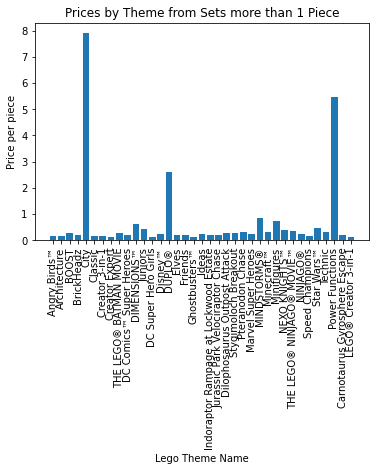

In [15]:
plt.bar(x='theme_name', height = 'price_per_piece', data = legoset)
_=plt.xlabel('Lego Theme Name')
plt.xticks(rotation = 90)
_ = plt.ylabel('Price per piece')
_ = plt.title('Prices by Theme from Sets more than 1 Piece')

The price per piece is still significantly higher in lego City, Power Functions and Duplo sets. It would make sence to evaluate this data separetely.

In [16]:
specific_sets = legoset[(legoset.theme_name == 'City')|(legoset.theme_name == 'DUPLO®')|(legoset.theme_name == 'Power Functions')]

In [17]:
specific_sets

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,price_per_piece
46,6-12,199.9900,35.0,888.0,4.7,Move heavy goods across LEGO® City with the Ca...,60052.0,Move heavy goods – and animals! – around the c...,Average,Cargo Train,4.4,City,3.8,US,0.225214
47,6-12,149.9900,45.0,610.0,4.4,Get around LEGO® City fast in the High-speed P...,60051.0,Travel around the city in no time with the mot...,Average,High-speed Passenger Train,4.4,City,4.0,US,0.245885
48,8-12,149.9900,1.0,1250.0,5.0,Haul in fresh supplies at the exploration site!,60162.0,Keep your camp well-supplied in the LEGO® City...,Average,Jungle Air Drop Helicopter,5.0,City,4.0,US,0.119992
49,6-12,119.9900,3.0,792.0,3.3,Sail the high seas and make a thrilling rescue!,60167.0,Strap on your life vest as part of the LEGO® C...,Average,Coast Guard Head Quarters,3.7,City,3.3,US,0.151503
50,8-12,119.9900,6.0,813.0,4.5,Discover the secrets of the jungle with the LE...,60161.0,Uncover amazing things at the Jungle Explorati...,Average,Jungle Exploration Site,4.3,City,4.0,US,0.147589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,2-5,24.3878,1.0,23.0,5.0,Join in Mater’s video chat with Lightning McQu...,10856.0,Little fans of Disney•Pixar’s Cars 3 will love...,Easy,Mater´s Shed,5.0,DUPLO®,5.0,PT,1.060339
9644,2-5,18.2878,1.0,15.0,3.0,Stop the crook and lock him in the police van!,10809.0,LEGO® DUPLO® Police Patrol is a great way to d...,Easy,Police Patrol,4.0,DUPLO®,3.0,PT,1.219187
9646,2-5,12.1878,2.0,15.0,5.0,Play all day with the cute LEGO® DUPLO® Family...,10838.0,Take a trip to the park to play with all the F...,Very Easy,Family Pets,5.0,DUPLO®,5.0,PT,0.812520
9739,5-12,48.7878,10.0,169.0,4.3,Pack your city with a bunch of new people!,60153.0,Grow your LEGO® City population with this peop...,Very Easy,People pack – Fun at the beach,4.1,City,3.6,PT,0.288685


Text(0.5, 1.0, 'City, Duplo and Power Functions Theme Prices')

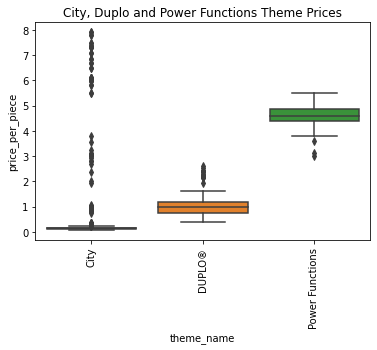

In [18]:


sns.boxplot(x = 'theme_name', y = 'price_per_piece', data = specific_sets)
plt.xticks(rotation = 90)
plt.title("City, Duplo and Power Functions Theme Prices")

It looks like Lego City set prices are most unpredictable with many outliers.

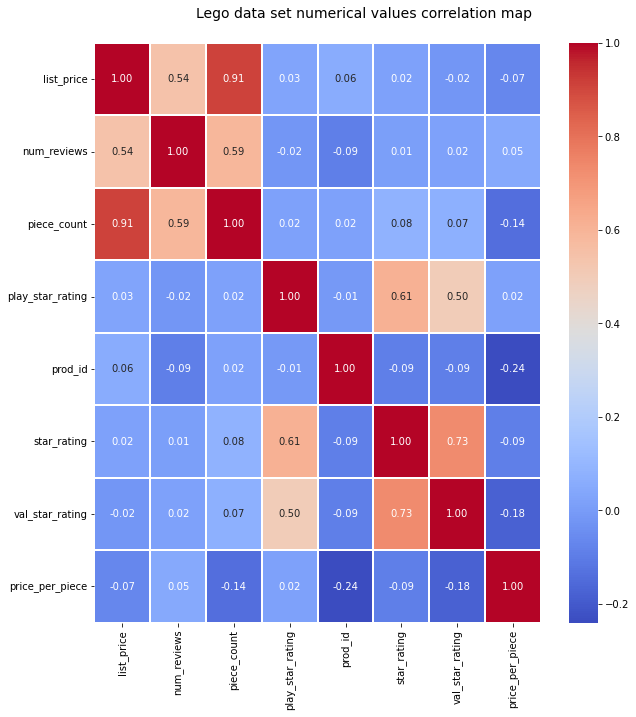

In [19]:
#creating correlation map

corrmat =  legoset.corr()
f, ax = plt.subplots(figsize = (10,10))

hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Lego data set numerical values correlation map', fontsize=14)

There is very high correlation (0.91) between piece count and price, and 0.52 correlation between number of reviews and price. <br>
Also, high correlations between all ratings: value rating, set rating, and play star rating.

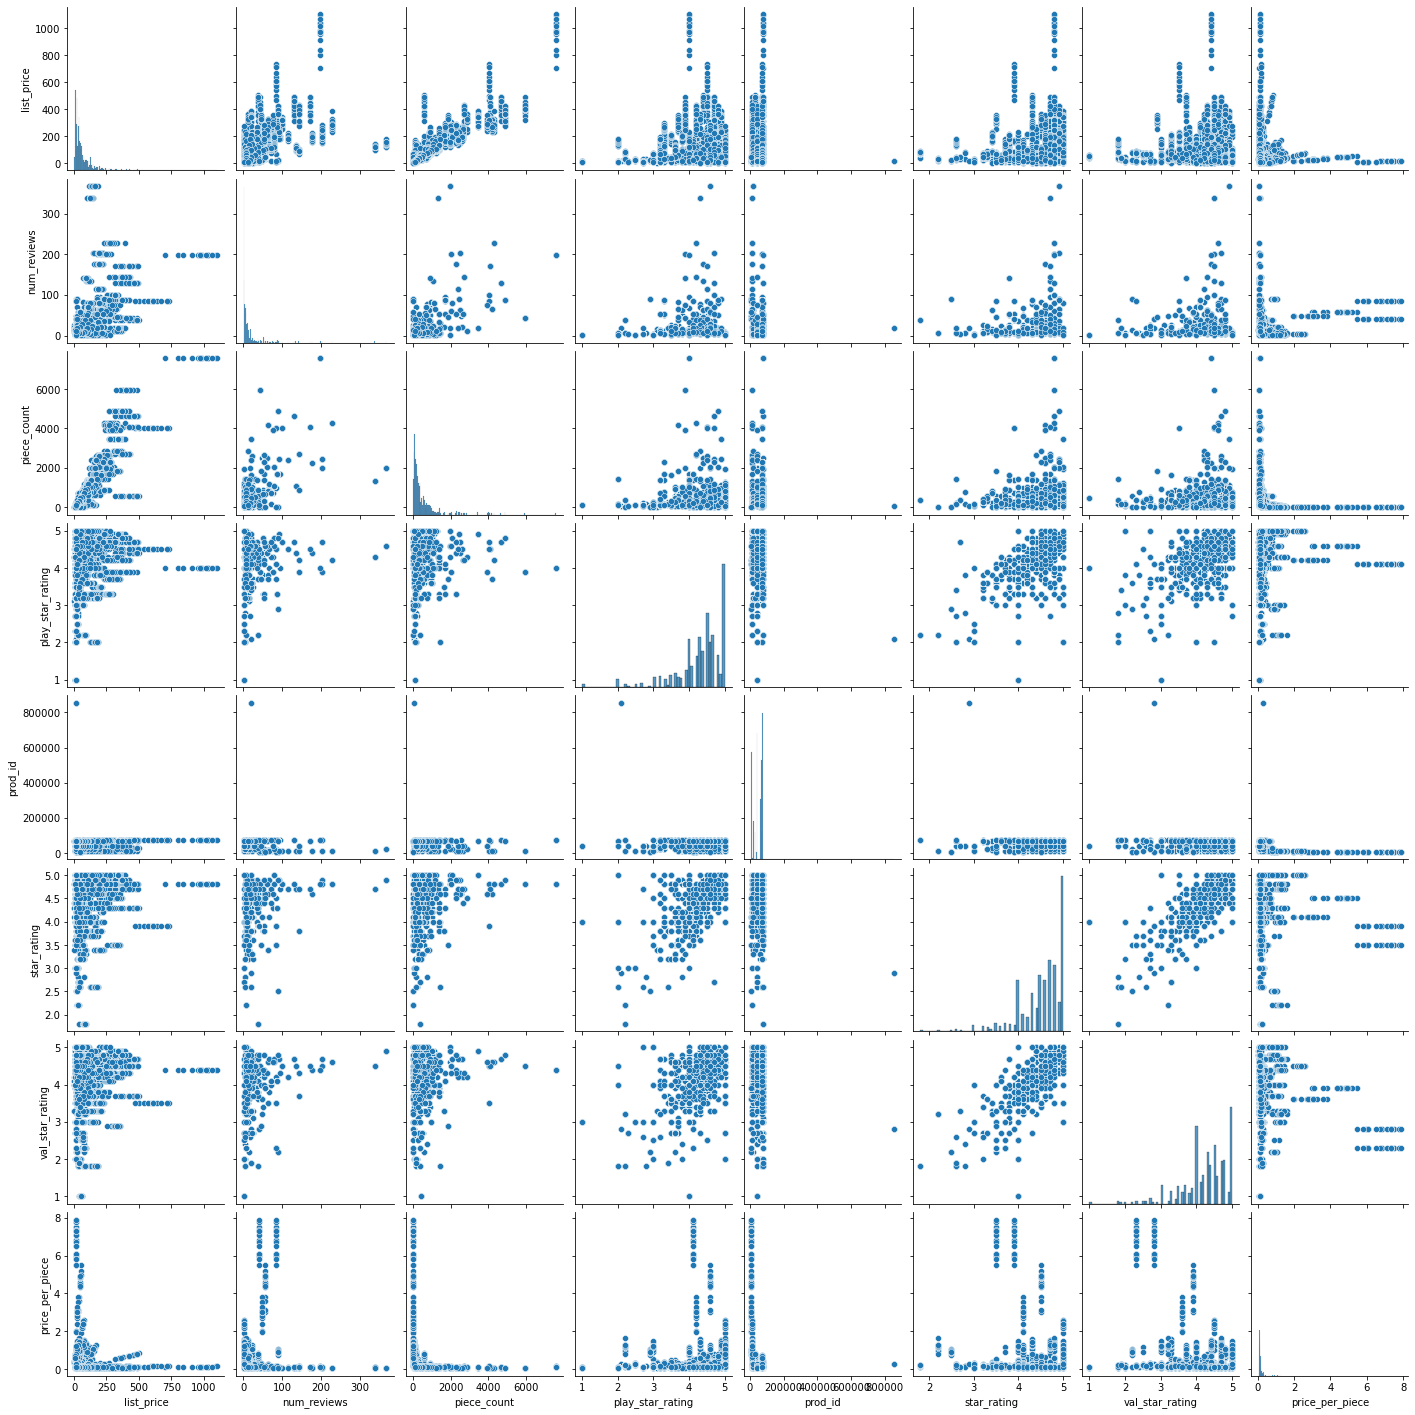

In [20]:
#Create a pairplot for all numeric variables
sns.pairplot(legoset,  palette='Set2')
plt.show()

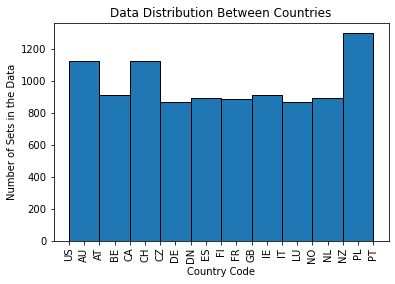

In [21]:
# Checking data distribution between countries:

plt.hist(x='country', data = legoset, edgecolor='black')
_ = plt.xlabel('Country Code')
_ = plt.xticks(rotation = 90)
_ = plt.ylabel('Number of Sets in the Data')
_ = plt.title('Data Distribution Between Countries')

In [22]:
num_sets = len(legodata['prod_id'])

In [23]:
print(num_sets)

9910
